In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time


In [2]:
### Run this cell

from torchvision import datasets, transforms
from torchvision.datasets import MNIST

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
!tar -zxvf MNIST.tar.gz

# Download and load the training data
trainset = MNIST(root ='./', download=False, train=True, transform=transform)
valset = MNIST(root = './', download=False, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)
print(type(images))
print(images.shape)
print(labels.shape)

tensor([6, 5, 1, 4, 4, 3, 8, 3, 7, 7, 7, 1, 9, 1, 8, 4, 4, 2, 9, 3, 7, 3, 3, 5,
        2, 2, 2, 4, 8, 1, 6, 5, 8, 2, 3, 0, 6, 3, 8, 8, 6, 7, 0, 2, 8, 9, 7, 7,
        3, 3, 3, 7, 9, 8, 8, 3, 2, 4, 2, 5, 6, 4, 3, 0])
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


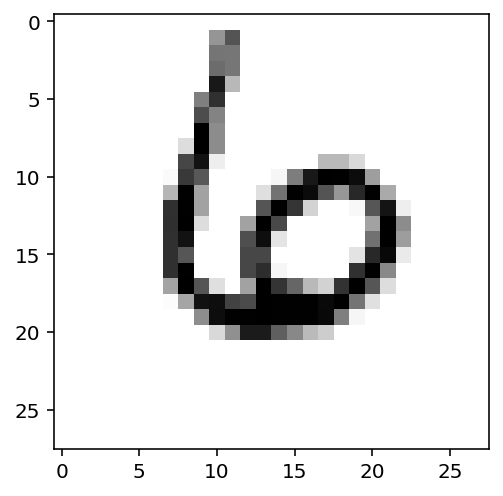

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

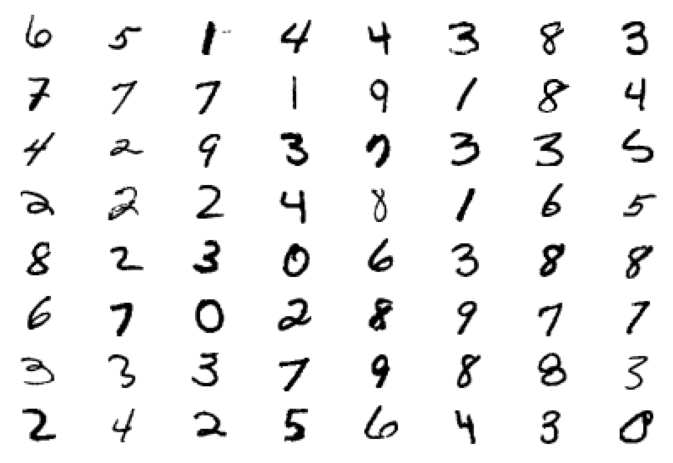

In [5]:
figure = plt.figure()
num_of_images = 64
for index in range(1, num_of_images+1):
    plt.subplot(8,8 , index)
    plt.axis('off')
    plt.imshow(images[index-1].numpy().squeeze(), cmap='gray_r')


In [6]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
print('Model 0 weight matrix:\n',model[0].weight,'\n')
print('Model 0 weight matrix shape:\n',model[0].weight.shape,'\n')
print('Model 0 bias matrix:\n',model[0].bias,'\n')
print('Model 0 bias matrix shape: \n',model[0].bias.shape,'\n')

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Model 0 weight matrix:
 Parameter containing:
tensor([[ 0.0357, -0.0043,  0.0016,  ...,  0.0183, -0.0277,  0.0249],
        [-0.0277, -0.0114, -0.0033,  ..., -0.0262, -0.0202, -0.0284],
        [ 0.0182,  0.0342,  0.0183,  ..., -0.0170, -0.0292,  0.0218],
        ...,
        [-0.0096,  0.0069,  0.0109,  ..., -0.0283,  0.0157, -0.0218],
        [ 0.0025, -0.0162, -0.0032,  ...,  0.0253,  0.0020, -0.0288],
        [ 0.0267,  0.0191,  0.0255,  ...,  0.0148, -0.0099, -0.0175]],
       requires_grad=True) 

Model 0 weight matrix shape:
 torch.Size([128, 784]) 

Model 0 bias matrix:
 Parameter containing:
tensor([ 0.0083,  0.0095, -0.0301,  0.0033, -0.0258, -0.0070, -0.0168, -0.0255,
         0.0177, -0.0297, -0.0151, -0.0212, -0.0077,  0.0244, -0.035

In [7]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
print(images.shape)
images = images.view(images.shape[0], -1)
print('Shape of Images:',images.shape)
print('Shape of Label:',labels.shape)
logps = model(images)
print(logps.shape)
loss = criterion(logps, labels)

torch.Size([64, 1, 28, 28])
Shape of Images: torch.Size([64, 784])
Shape of Label: torch.Size([64])
torch.Size([64, 10])


In [8]:
print('Weights Dimension: ', model[0].weight.shape)

Weights Dimension:  torch.Size([128, 784])


In [9]:
print(model[0])
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)
model[0].weight.grad.shape

Linear(in_features=784, out_features=128, bias=True)
Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.8825e-04,  2.8825e-04,  2.8825e-04,  ...,  2.8825e-04,
          2.8825e-04,  2.8825e-04],
        [-3.6455e-06, -3.6455e-06, -3.6455e-06,  ..., -3.6455e-06,
         -3.6455e-06, -3.6455e-06],
        [-2.3091e-04, -2.3091e-04, -2.3091e-04,  ..., -2.3091e-04,
         -2.3091e-04, -2.3091e-04],
        ...,
        [ 9.7869e-04,  9.7869e-04,  9.7869e-04,  ...,  9.7869e-04,
          9.7869e-04,  9.7869e-04],
        [-4.0446e-03, -4.0446e-03, -4.0446e-03,  ..., -4.0446e-03,
         -4.0446e-03, -4.0446e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


torch.Size([128, 784])

In [10]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [11]:
model.parameters()

<generator object Module.parameters at 0x7fe6ed390eb0>

In [12]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0357, -0.0043,  0.0016,  ...,  0.0183, -0.0277,  0.0249],
        [-0.0277, -0.0114, -0.0033,  ..., -0.0262, -0.0202, -0.0284],
        [ 0.0182,  0.0342,  0.0183,  ..., -0.0170, -0.0292,  0.0218],
        ...,
        [-0.0096,  0.0069,  0.0109,  ..., -0.0283,  0.0157, -0.0218],
        [ 0.0025, -0.0162, -0.0032,  ...,  0.0253,  0.0020, -0.0288],
        [ 0.0267,  0.0191,  0.0255,  ...,  0.0148, -0.0099, -0.0175]],
       requires_grad=True)
Gradient - tensor([[-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [13]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0357, -0.0043,  0.0017,  ...,  0.0183, -0.0277,  0.0249],
        [-0.0277, -0.0114, -0.0033,  ..., -0.0262, -0.0202, -0.0284],
        [ 0.0182,  0.0342,  0.0183,  ..., -0.0170, -0.0292,  0.0218],
        ...,
        [-0.0096,  0.0069,  0.0109,  ..., -0.0283,  0.0158, -0.0218],
        [ 0.0025, -0.0163, -0.0033,  ...,  0.0252,  0.0020, -0.0288],
        [ 0.0267,  0.0191,  0.0255,  ...,  0.0148, -0.0099, -0.0175]],
       requires_grad=True)


In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6543902205362884
Epoch 1 - Training loss: 0.2783979733488453
Epoch 2 - Training loss: 0.21392184686559096
Epoch 3 - Training loss: 0.1738701646388975
Epoch 4 - Training loss: 0.14621109327773996
Epoch 5 - Training loss: 0.12706657855618578
Epoch 6 - Training loss: 0.11116829215249083
Epoch 7 - Training loss: 0.09861909114578957
Epoch 8 - Training loss: 0.08906118099543966
Epoch 9 - Training loss: 0.08114611444824031
Epoch 10 - Training loss: 0.07372109683603843
Epoch 11 - Training loss: 0.06698815435913802
Epoch 12 - Training loss: 0.06269264654881919
Epoch 13 - Training loss: 0.05653332075057452
Epoch 14 - Training loss: 0.05320618047551719

Training Time (in minutes) = 4.237667926152548


In [15]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

torch.Size([1, 28, 28])
Predicted Digit = 8


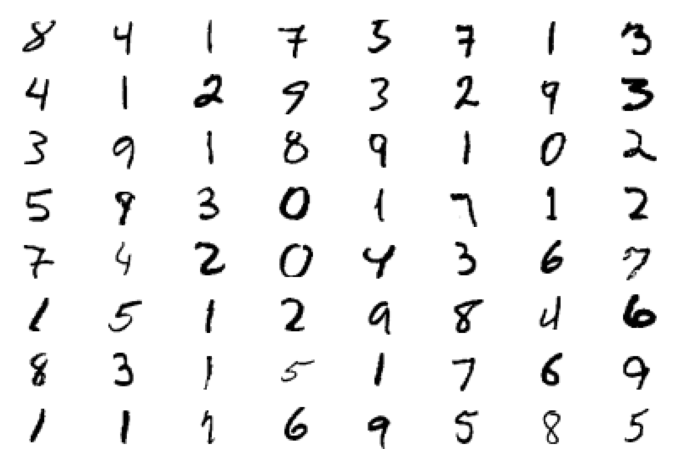

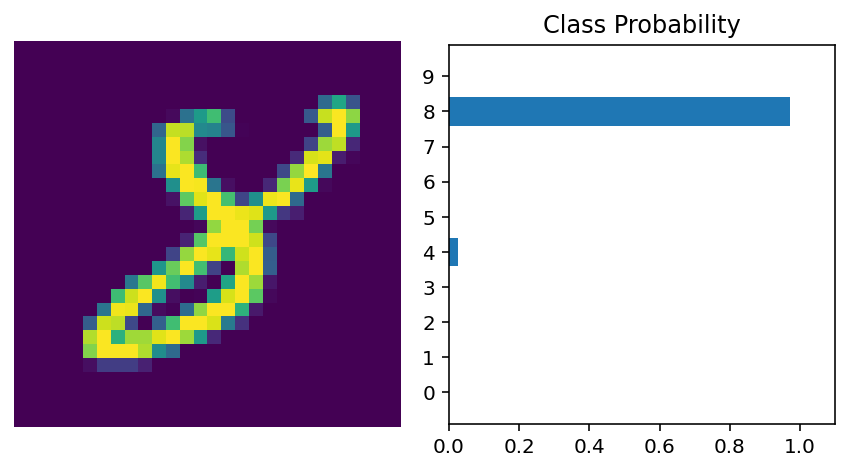

In [40]:
images, labels = next(iter(valloader))

print(images[0].shape)

img = images[0].view(1, 784)

for index in range(1, 64+1):
    
    
    plt.subplot(8,8 , index)
    plt.axis('off')
    plt.imshow(images[index-1].numpy().squeeze(), cmap='gray_r')


# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

    
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [19]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9735
